In [1]:
%matplotlib inline
import pandas
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from astropy.io import ascii
from astropy.table import Table, Column
import lightkurve
import emcee
import batman
from lightkurve.lightcurve import LightCurve
from ldtk import (LDPSetCreator,BoxcarFilter)
from ldtk.filters import kepler

In [16]:
data_path = '/Users/willwaalkes/Desktop/CU_Boulder/Research/TESS_Followup/'

data = pandas.read_csv(data_path+'TIC_447061717/TIC447061717-01_20200223_LCO-SAAO-1m_ic_measurements.csv')
params = pandas.read_csv('Data/TESS_Objects.csv',comment='#')

In [4]:
data.keys()[60:80]

Index(['Width_C2', 'X-Width_C2', 'Y-Width_C2', 'Angle_C2', 'Roundness_C2',
       'Variance_C2', 'X(IJ)_C3', 'Y(IJ)_C3', 'X(FITS)_C3', 'Y(FITS)_C3',
       'Source-Sky_C3', 'Source_Error_C3', 'Source_SNR_C3', 'Peak_C3',
       'Mean_C3', 'Sky/Pixel_C3', 'FWHM_C3', 'Width_C3', 'X-Width_C3',
       'Y-Width_C3'],
      dtype='object')

In [5]:
TIC_ID = []
names = params['TIC ID']
for i in range(len(names)):
    TIC_ID.append(int(names[i]))

In [8]:
index = int(147)
#planet_name = params['Planet'][index]
planet_name = TIC_ID[index]
observatory = 'LCO 1-m'
print(planet_name)

447061717


In [9]:
BJD = data['BJD_MOBS']#data['BJD_TDB']
times = np.array(BJD)
offset = int(times[0])
times = times-offset

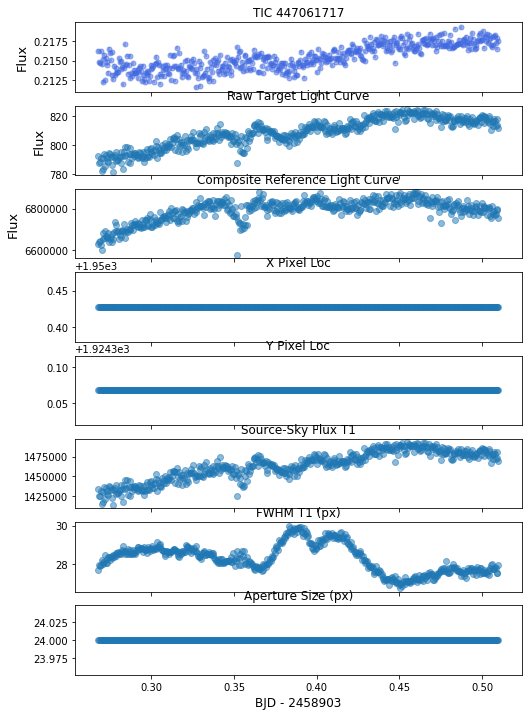

In [14]:
f, (a0, a1, a2,a3,a4,a5,a6,a7) = plt.subplots(8,1,figsize=(8,12),sharex=True)

a0.set_title('TIC {}'.format(planet_name))
a0.set_ylabel('Flux',fontsize=13)
a0.errorbar(times,data['rel_flux_T1'],yerr=data['rel_flux_err_T1'],
            fmt='o',alpha=0.5,color='royalblue',markersize='5')

a1.set_title('Raw Target Light Curve')
a1.set_ylabel('Flux',fontsize=13)
a1.scatter(times,data['Mean_T1'],alpha=0.5)

a2.set_title('Composite Reference Light Curve')
a2.set_ylabel('Flux',fontsize=13)
a2.scatter(times,data['tot_C_cnts'],alpha=0.5)

a3.set_title('X Pixel Loc')
a3.scatter(times,data['X(IJ)_T1'],alpha=0.5)

a4.set_title('Y Pixel Loc')
a4.scatter(times,data['Y(IJ)_T1'],alpha=0.5)

a5.set_title('Source-Sky Flux T1')
a5.scatter(times,data['Source-Sky_T1'],alpha=0.5)

a6.set_title('FWHM T1 (px)')
a6.scatter(times,data['FWHM_T1'],alpha=0.5)

a7.set_title('Aperture Size (px)')
a7.scatter(times,data['Source_Radius'],alpha=0.5)
a7.set_xlabel('BJD - '+str(offset),fontsize=12)

plt.savefig('inspections.pdf')
plt.show()

KeyError: 'rel_flux_T2'

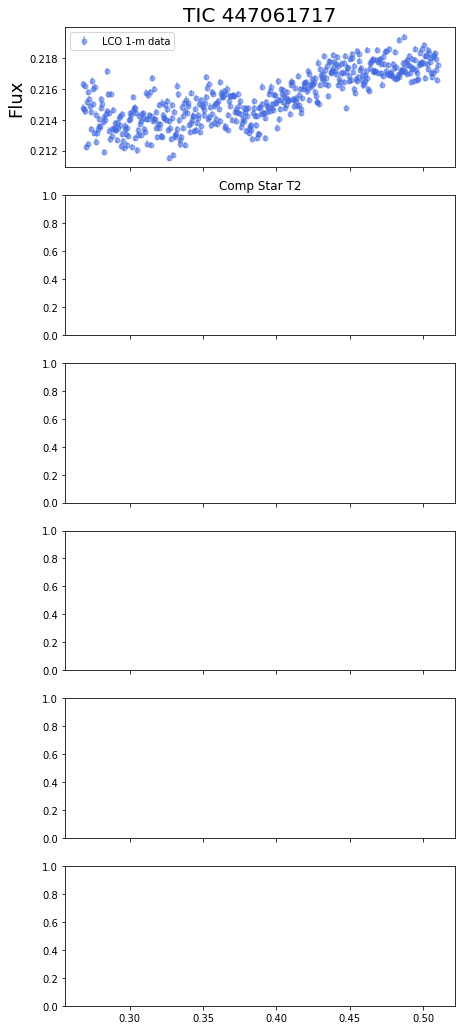

In [18]:
f, (a0, a1, a2, a3, a4, a5) = plt.subplots(6,1,figsize=(7,18),sharex=True)

first = 'T2'
second = 'T3'
third = 'T4'
fourth = 'T5'
fifth = 'T6'

a0.set_title('TIC {}'.format(planet_name),fontsize=20)
a0.set_ylabel('Flux',fontsize=18)
a0.errorbar(times,data['rel_flux_T1'],yerr=data['rel_flux_err_T1'],
            fmt='o',alpha=0.5,color='royalblue',
            markersize='5',label=observatory+' data')
a0.legend()

a1.set_title('Comp Star {}'.format(first))
a1.errorbar(times,data['rel_flux_{}'.format(first)],yerr=data['rel_flux_err_{}'.format(first)],
            alpha=0.5,fmt='o')

a2.set_title('Comp Star {}'.format(second))
a2.errorbar(times,data['rel_flux_{}'.format(second)],yerr=data['rel_flux_err_{}'.format(second)],
            alpha=0.5,fmt='o')

a3.set_title('Comp Star {}'.format(third))
a3.errorbar(times,data['rel_flux_{}'.format(third)],yerr=data['rel_flux_err_{}'.format(third)],
            alpha=0.5,fmt='o')

a4.set_title('Comp Star {}'.format(fourth))
a4.errorbar(times,data['rel_flux_{}'.format(fourth)],yerr=data['rel_flux_err_{}'.format(fourth)],
            alpha=0.5,fmt='o')

a5.set_title('Comp Star {}'.format(fifth))
a5.errorbar(times,data['rel_flux_{}'.format(fifth)],yerr=data['rel_flux_err_{}'.format(fifth)],
            alpha=0.5,fmt='o')
a5.set_xlabel('BJD - '+str(offset),fontsize=12)

plt.savefig('Comparison_Stars.pdf')
plt.show()

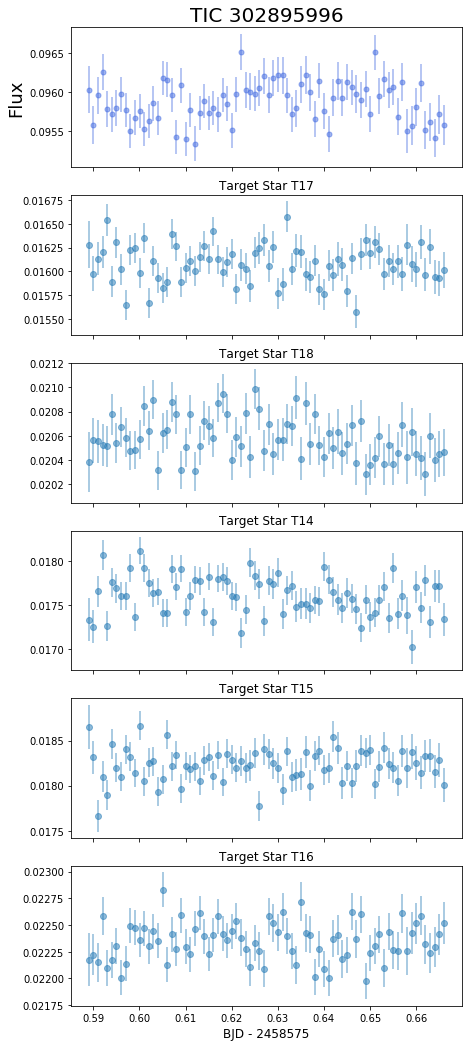

In [60]:
f, (a0, a1, a2, a3, a4, a5) = plt.subplots(6,1,figsize=(7,18),sharex=True)

first = 'T17'
second = 'T18'
third = 'T14'
fourth = 'T15'
fifth = 'T16'

a0.set_title('TIC {}'.format(planet_name),fontsize=20)
a0.set_ylabel('Flux',fontsize=18)
a0.errorbar(times,data['rel_flux_T1'],yerr=data['rel_flux_err_T1'],
            fmt='o',alpha=0.5,color='royalblue',markersize='5')

a1.set_title('Target Star {}'.format(first))
a1.errorbar(times,data['rel_flux_{}'.format(first)],yerr=data['rel_flux_err_{}'.format(first)],
            alpha=0.5,fmt='o')

a2.set_title('Target Star {}'.format(second))
a2.errorbar(times,data['rel_flux_{}'.format(second)],yerr=data['rel_flux_err_{}'.format(second)],
            alpha=0.5,fmt='o')

a3.set_title('Target Star {}'.format(third))
a3.errorbar(times,data['rel_flux_{}'.format(third)],yerr=data['rel_flux_err_{}'.format(third)],
            alpha=0.5,fmt='o')

a4.set_title('Target Star {}'.format(fourth))
a4.errorbar(times,data['rel_flux_{}'.format(fourth)],yerr=data['rel_flux_err_{}'.format(fourth)],
            alpha=0.5,fmt='o')

a5.set_title('Target Star {}'.format(fifth))
a5.errorbar(times,data['rel_flux_{}'.format(fifth)],yerr=data['rel_flux_err_{}'.format(fifth)],
            alpha=0.5,fmt='o')
a5.set_xlabel('BJD - '+str(offset),fontsize=12)

plt.savefig('Target_Stars.pdf')
plt.show()